In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load in the data and scale it
df = pd.read_csv('Encoded_data_3000_V2.csv', index_col=0)

In [3]:
df.columns

Index(['Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose Climbers',
       'Category_Rose Floribundas', 'Category_Rose Hybrid Teas',
       'Category_Rose Miniatures', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category_Water & Aquatic Plants',
       'Category_lawns', 'Light_Low light tolerant', 'Light_Semi shade',
       'Light_Shade growing', 'Light_Sun growing', 'Water_Can tolerate less',
       'Water_Can tolerate more', 'Water_Normal', 'Water_Re

In [4]:
df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [5]:
kmean_data = df.copy()
data = df

In [6]:
kmean_data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [7]:
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


# KMeans

In [8]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=36, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(kmean_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(data['Cluster'].value_counts())

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


27    150
13    136
11    116
2     106
28     97
29     89
23     89
16     89
8      77
26     75
21     73
3      71
5      69
25     67
12     66
7      63
9      63
18     59
10     59
4      59
14     56
17     55
20     54
24     52
6      51
34     51
35     47
15     46
32     46
0      44
33     42
19     37
1      34
22     27
30     25
31     22
Name: Cluster, dtype: int64


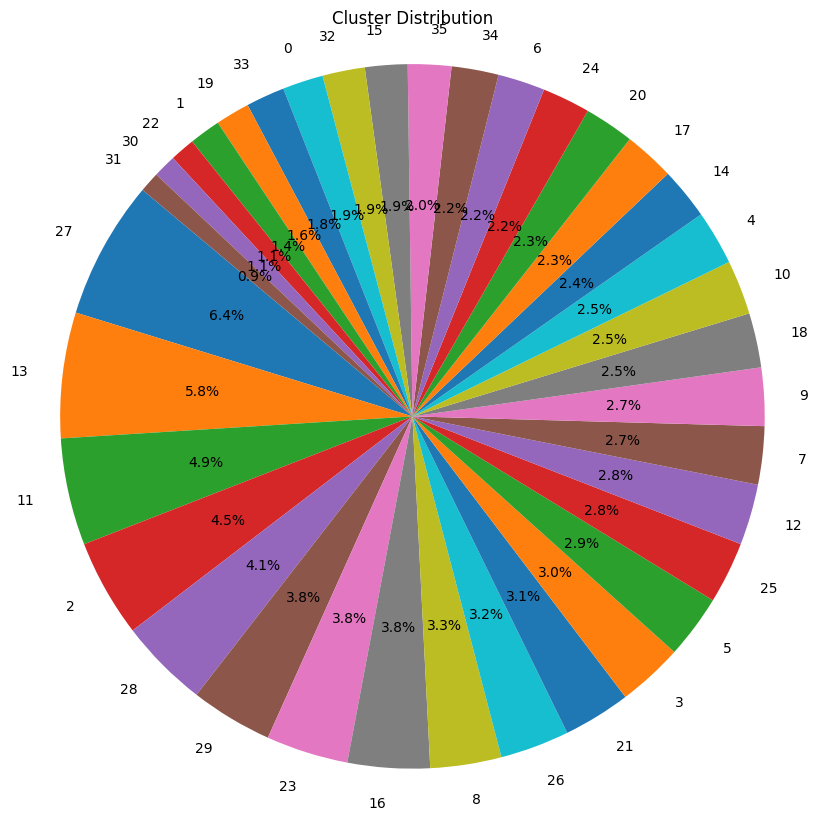

In [9]:
# Calculate the count of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Visualize cluster distribution using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(kmean_data, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.20079748850441442


In [11]:
#dataframe with cluster labels
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping,Cluster
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,14
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,21
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,25
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,25
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,28


In [31]:
# Assuming 'data' is your DataFrame
data.to_csv('KMeans_data_with_cluster_id.csv')

In [15]:
#Calculating cluster means

# Group data by cluster and calculate cluster means
cluster_means = data.groupby('Cluster').mean()

# Create a new dataframe to store cluster means
cluster_means_df = pd.DataFrame(cluster_means)

# Display the cluster means dataframe
cluster_means_df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.022727,0.000000,0.522727,0.000000,0.000000,0.000000,0.022727,0.000000,0.022727,0.681818,...,0.000000,0.045455,0.000000,0.159091,0.022727,0.000000,0.113636,0.659091,0.295455,0.000000
1,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.441176,...,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.029412,0.794118,0.852941,0.000000
2,0.009434,0.000000,0.028302,0.000000,0.000000,0.000000,0.415094,0.000000,0.009434,0.801887,...,0.000000,0.000000,0.028302,0.009434,0.009434,0.000000,0.132075,0.528302,0.669811,0.009434
3,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.028169,0.000000,0.000000,0.169014,...,0.901408,0.014085,0.028169,0.084507,0.000000,0.000000,0.000000,0.028169,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016949,...,0.000000,0.067797,0.169492,0.000000,0.000000,0.033898,0.220339,0.322034,0.610169,0.169492
5,0.014493,0.014493,0.043478,0.000000,0.000000,0.000000,0.014493,0.000000,0.014493,0.115942,...,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.043478,0.101449,0.942029,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.705882,0.000000,0.000000,...,0.019608,0.019608,0.039216,0.000000,0.039216,0.019608,0.431373,0.333333,0.529412,0.000000
7,0.031746,0.000000,0.015873,0.000000,0.000000,0.000000,0.079365,0.031746,0.031746,0.380952,...,0.000000,0.015873,0.111111,0.000000,0.000000,0.000000,0.111111,0.698413,0.587302,0.000000
8,0.181818,0.025974,0.038961,0.000000,0.000000,0.000000,0.025974,0.025974,0.181818,0.636364,...,0.012987,0.000000,0.000000,0.038961,0.025974,0.000000,0.142857,0.714286,0.389610,0.038961


In [30]:
# Assuming 'cluster_means_df' is your DataFrame
cluster_means_df.to_csv('KMeans_cluster_means_df.csv')

# Recommendation

In [17]:
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping,Cluster
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,14
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,21
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,25
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,25
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,28


In [18]:
cluster_means_df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.022727,0.000000,0.522727,0.000000,0.000000,0.000000,0.022727,0.000000,0.022727,0.681818,...,0.000000,0.045455,0.000000,0.159091,0.022727,0.000000,0.113636,0.659091,0.295455,0.000000
1,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.441176,...,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.029412,0.794118,0.852941,0.000000
2,0.009434,0.000000,0.028302,0.000000,0.000000,0.000000,0.415094,0.000000,0.009434,0.801887,...,0.000000,0.000000,0.028302,0.009434,0.009434,0.000000,0.132075,0.528302,0.669811,0.009434
3,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.028169,0.000000,0.000000,0.169014,...,0.901408,0.014085,0.028169,0.084507,0.000000,0.000000,0.000000,0.028169,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016949,...,0.000000,0.067797,0.169492,0.000000,0.000000,0.033898,0.220339,0.322034,0.610169,0.169492
5,0.014493,0.014493,0.043478,0.000000,0.000000,0.000000,0.014493,0.000000,0.014493,0.115942,...,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.043478,0.101449,0.942029,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.705882,0.000000,0.000000,...,0.019608,0.019608,0.039216,0.000000,0.039216,0.019608,0.431373,0.333333,0.529412,0.000000
7,0.031746,0.000000,0.015873,0.000000,0.000000,0.000000,0.079365,0.031746,0.031746,0.380952,...,0.000000,0.015873,0.111111,0.000000,0.000000,0.000000,0.111111,0.698413,0.587302,0.000000
8,0.181818,0.025974,0.038961,0.000000,0.000000,0.000000,0.025974,0.025974,0.181818,0.636364,...,0.012987,0.000000,0.000000,0.038961,0.025974,0.000000,0.142857,0.714286,0.389610,0.038961


In [19]:
def recommend_plants(input_values, cluster_means_df, data, top_n=20):

    # Prepare input vector for cluster-mean similarity
    user_vector = pd.DataFrame(index=[0], columns=cluster_means_df.columns)
    user_vector = user_vector.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in user_vector.columns:
            user_vector.at[0, column] = 1  # Set the input value to 1 in the input vector
            

    # Step 2: Calculate similarity between the user vector and the cluster mean vectors
    cluster_similarities = cosine_similarity(user_vector, cluster_means_df)

    # Find the cluster with the highest similarity
    optimal_cluster = np.argmax(cluster_similarities)
    print("Optimal Cluster:", optimal_cluster)
    
    
    # Prepare input vector for cluster similarity
    user_vector1 = pd.DataFrame(index=[0], columns=data.columns)
    user_vector1 = user_vector1.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in user_vector1.columns:
            user_vector1.at[0, column] = 1  # Set the input value to 1 in the input vector
            

    # Step 3: Calculate similarity between the user vector and plants in the optimal cluster
    optimal_cluster_indices = data[data['Cluster'] == optimal_cluster].index
    optimal_cluster_data = data.loc[optimal_cluster_indices]
    similarities = cosine_similarity(user_vector1, optimal_cluster_data)
    optimal_cluster_data['Similarity'] = similarities.flatten()
    
        
    # Sort by similarity scores in descending order
    recommended_plants = optimal_cluster_data.sort_values(by='Similarity', ascending=False).head(top_n)
    #print(recommended_plants)
    return recommended_plants[['Similarity']]


    return recommended_plants

In [20]:
# Example usage

input_values = {
    'Category_Shrubs': 1,
    'Light_Sun growing': 1,
    'Light_Semi shade': 1,
    'Water_Normal': 1,
    'Primarily_Grown_for_Flowers': 1,
    'Flowering_Season_Year-around flowering': 1,
    'Spread_or_Width_1 to 2 meters': 1,
    'Height_or_Length_1 to 2 meters': 1,
    'Foliage_Color_Green': 1
    
}

recommendations = recommend_plants(input_values, cluster_means_df, data)
if recommendations is not None:
    print(recommendations)

Optimal Cluster: 13
          Similarity
Plant_Id            
395         0.210819
1286        0.210819
509         0.210235
2458        0.210235
1887        0.210235
1644        0.210235
1524        0.210235
13          0.209657
1277        0.209657
971         0.209657
1007        0.209657
1044        0.209657
1240        0.209657
1263        0.209657
1266        0.209657
1269        0.209657
1291        0.209657
1287        0.209657
108         0.209657
1907        0.209657


In [21]:
list_plant = recommendations.index.tolist()
list_plant

[395,
 1286,
 509,
 2458,
 1887,
 1644,
 1524,
 13,
 1277,
 971,
 1007,
 1044,
 1240,
 1263,
 1266,
 1269,
 1291,
 1287,
 108,
 1907]

In [22]:
# Load in the data and scale it
plant_data = pd.read_csv('data_indiaplant_1_3000.csv', index_col=0)

In [23]:
plant_data

,Plant_Id,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
0,1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
1,2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
2,4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
3,5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
4,7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
906,2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
907,2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and 

In [24]:
plant_data = plant_data.set_index('Plant_Id')
plant_data

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and easy to g

In [25]:
extracted_rows = plant_data.loc[list_plant]

In [26]:
extracted_rows

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
395,Stachytarpheta indica red,"Stachytarpheta Red, Brazilian Tea",NaN,Shrubs,Verbenaceae or Verbena family,"Sun growing, Semi shade",Normal,Flowers,Year-around flowering,Green,1 to 2 meters,1 to 2 meters,"Spreading, Upright or Erect",NaN,"Indigenous (native to India), Good for screeni...","Great for attracting birds., Native - Africa a...",Plants are susceptible to waterlogging and sho...
1286,Malvaviscus arboreus rosea,NaN,Marathi - Mirchi Jasvandh Gulabi,Shrubs,Malvaceae Hibiscus or Cotton family,"Sun growing, Semi shade",Normal,Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Auspicious or Feng Shui plant, Good for Cut fl...","Native tropical America., The flowers are a lo...","Very easy to grow., Do well in semi shade and ..."
509,"Daedalacanthus nervosus, Eranthemum pulchellum",Daedalacanthus Nervosus,Marathi - Nili Aboli,"Shrubs, Groundcovers",Acanthaceae or Crossandra or Thunbergia family,"Sun growing, Semi shade",Normal,Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Indigenous (native to India), Auspicious or Fe...","Native from India, Sri Lanka., Evergreen shrub...","Very quick growing., Grow well in partial shad..."
2458,Gardenia taitensis,Tiare,"Bengali - Gandharaj, Hindi - Gandharaj, Oriya ...",Shrubs,Rubiaceae or Ixora and Pentas family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Fragrant flowers or leaves, Auspicious or Feng...",This gardenia has huge star saped single flowe...,"Soil - rich, humid, acid, As with the other ga..."
1887,Aphelandra sinclairiana,"Panama, Coral Aphelandra",NaN,Shrubs,Acanthaceae or Crossandra or Thunbergia family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Irregular,NaN,"Rare Plant or difficult to get plant, Attracts...","Well shaped shrub to about 2 m high., Leaves l...",An easy plant to grow plant. Does best in semi...
1644,Mussaenda philippica calcutta sunrise,Mussaenda Orange,Marathi - Musanda Keshari,Shrubs,Rubiaceae or Ixora and Pentas family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Upright or Erect,NaN,"Indigenous (native to India), Good for screeni...",This is a relatively new introduction. The flo...,"Plants are quick growing., They are vigerous a..."
1524,Clerodendrum macrosphon,Clerodendrum Macrosphon,NaN,Shrubs,Verbenaceae or Verbena family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Good for screening, Good for Hedges and Border...","A beautiful, dwarf, bushy shrub., Grows to 1 m...",Plant is easy to grow. Can grow in full sun in...
13,Heliconia latispatha distans,Heliconia Orange Red Yellow,Marathi - Heliconia,Shrubs,Musaceae or Banana family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,"Spreading, Upright or Erect",NaN,"Rare Plant or difficult to get plant, Good for...",A not so often seen variety. Will definitely b...,Heliconias are tropical plants. They like it w...
1277,"Lemonia spectabilis, Ravenia spectabilis","Limonia, Pink Ravenia",Marathi - Lemonia Hirva,Shrubs,Rutaceae or Lemon family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,"Spherical or rounded, Spreadi